# Retirement Planner

---

## Environment Setup

In [59]:
# Import libraries and dependencies
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import alpaca_trade_api as tradeapi

%matplotlib inline

In [60]:
# Set the random seed for results reproducibility (for testing purposes only)
np.random.seed(42)

---

## Portfolio Planner

In this activity, you will use the Alpaca API to grab historical data for a `60/40` portfolio using `SPY` to represent the stock portion and `AGG` to represent the bonds.

In [61]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

# Set Alpaca API key and secret
alpaca_api_key = os.getenv("alpaca_key")
alpaca_secret_key = os.getenv("alpaca_secret_key")

# Verify that Alpaca keys were loaded
api_key=os.getenv("alpaca_key")
secret_key =os.getenv("alpaca_secret_key")
type(api_key)
type(secret_key)

str

In [81]:
# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

# Data Collection

In this step, you will need to use the Alpaca api to fetch closing prices for the `SPY` and `AGG` tickers. Save the results as a pandas DataFrame. 

*Note*: Results may vary from solution due to different time periods being called on the api.


In [87]:
# Subset your tickers, then pull returns data:
# Set the ticker
ticker = ["SPY", "AGG"]

# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes of 1 year, between now and 365 days ago.
# Results may vary from the solution based on the time frame chosen
start = pd.Timestamp('2010-01-01', tz='America/New_York').isoformat()
end = pd.Timestamp('2010-12-31', tz='America/New_York').isoformat()

# Get 1 year's worth of historical data for SPY and AGG
df = api.get_barset(
    ticker,
    timeframe,
    limit=None,
    start=start,
    end=end,
    after=None,
    until=None,
).df

# Drop unnecessary columns
df = df.drop(
    columns=['open', 'high', 'low', 'volume'],
    level=1   
)

In [88]:
# Display sample data
df.index =df.index.date 
df.head()

,AGG,SPY
,close,close
2010-01-04,103.250,113.32
2010-01-05,103.740,113.63
2010-01-06,103.690,113.74
2010-01-07,103.580,114.20
2010-01-08,103.706,114.57


---

## Monte Carlo Simulation

In this step, you will run Monte Carlo Simulations for your portfolio to model portfolio performance at different retirement ages. 

Complete the following steps:

1. Calculate the daily returns for the SPY and AGG closing prices.

2. Calculate volatility for both the SPY and AGG closing prices.

3. Find the last day's closing price for both stocks and save those as variables

4. Run a Monte Carlo Simulation of at least `100` iterations and generate at least `30` years of closing prices

**Hint:** There are `252` trading days per year, so the number of records to generate for each Monte Carlo run will be `252 days * 30 years`.

In [89]:
# Calculate the daily roi for the stocks
# Display sample data
returns = df.pct_change().dropna()
returns.head()

,AGG,SPY
,close,close
2010-01-05,0.004746,0.002736
2010-01-06,-0.000482,0.000968
2010-01-07,-0.001061,0.004044
2010-01-08,0.001216,0.003240
2010-01-11,-0.001697,0.001397


In [90]:
# Compute daily volatility
volatility =returns.std()
spy_volatility = volatility["SPY"]["close"]
agg_volatility = volatility["AGG"]["close"]
print(spy_volatility)
print(agg_volatility)

0.011259829689691608
0.0025980894593946578


In [91]:
# Save the last day's closing price
spy_price = df["SPY"]["close"][-1]
agg_price = df["AGG"]["close"][-1]
print(spy_price)
print(agg_price)

125.8
105.72


In [92]:
# Setup the Monte Carlo Parameters
simulations = 500
records = 252 * 30
monte_carlo = pd.DataFrame()

In [93]:
# Run the Monte Carlo Simulation
for x in range(simulations):
    
    print(f"Running Simulation {x}...")
    
    # Create the initial simulated prices array seeded with the last closing price
    spy_prices = [spy_price]
    agg_prices = [agg_price]
    
    # Simulate the returns for 20 years
    for i in range(number_records):
        spy_prices.append(
            spy_prices[-1] * (1 + np.random.normal(returns.mean()["SPY"]["close"], spy_volatility)))
        agg_prices.append(
            agg_prices[-1] * (1 + np.random.normal(returns.mean()["AGG"]["close"], agg_volatility)))

    # Create a DataFrame of the simulated prices
    portfolio = pd.DataFrame({
        "SPY Simulated Prices": spy_prices,
        "AGG Simulated Prices": agg_prices
    })

    # Calculate the Portfolio Daily Returns
    portfolio_returns=portfolio.pct_change()
    
    # Set the Portfolio Weights (Assume a 60/40 stocks to bonds ratio)
    stocks = 0.60
    bonds = 0.40
    
    
    # Calculate the weighted portfolio return: 
    portfolio_returns = stocks * portfolio_returns["SPY Simulated Prices"] + bonds * portfolio_returns["AGG Simulated Prices"]
    
    # Calculate the normalized, cumulative return series
    monte_carlo[x] = (1 + portfolio_returns.fillna(0)).cumprod()

Running Simulation 0...
Running Simulation 1...
Running Simulation 2...
Running Simulation 3...
Running Simulation 4...
Running Simulation 5...
Running Simulation 6...
Running Simulation 7...
Running Simulation 8...
Running Simulation 9...
Running Simulation 10...
Running Simulation 11...
Running Simulation 12...
Running Simulation 13...
Running Simulation 14...
Running Simulation 15...
Running Simulation 16...
Running Simulation 17...
Running Simulation 18...
Running Simulation 19...
Running Simulation 20...
Running Simulation 21...
Running Simulation 22...
Running Simulation 23...
Running Simulation 24...
Running Simulation 25...
Running Simulation 26...
Running Simulation 27...
Running Simulation 28...
Running Simulation 29...
Running Simulation 30...
Running Simulation 31...
Running Simulation 32...
Running Simulation 33...
Running Simulation 34...
Running Simulation 35...
Running Simulation 36...
Running Simulation 37...
Running Simulation 38...
Running Simulation 39...
Running Si

In [94]:
# Check that the simulation ran successfully
monte_carlo.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003539,0.993520,0.990098,0.998898,1.007105,1.009569,1.013023,0.993868,1.002128,0.998553,...,1.002533,0.993762,1.009830,0.999465,0.996414,1.003851,0.994120,0.990613,1.004033,0.995977
2,1.009846,0.998472,0.988508,0.997382,1.011429,0.996208,1.004791,0.978617,1.000590,1.010220,...,1.004979,1.003706,1.013790,1.001277,0.997985,0.999343,0.992970,0.990905,1.003580,1.000776
3,1.008333,0.998153,0.993100,0.988687,1.010155,1.000417,1.009777,0.969961,0.999880,1.021229,...,1.004591,1.007405,1.020040,1.002843,0.988362,0.997079,0.997674,0.998699,1.007898,0.998550
4,1.020225,1.001801,0.987468,0.996385,1.011692,0.992785,1.007438,0.965881,1.010662,1.006130,...,1.006984,1.004328,1.017569,1.010021,0.996665,0.992440,0.989367,0.999202,1.014052,1.003118


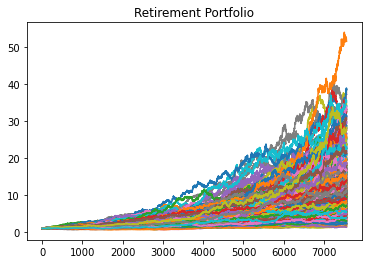

In [95]:
# Visualize the Simulation
monte_carlo.plot(
    legend=None,
    title="Retirement Portfolio"
)

In [96]:
# Select the last row for the cumulative returns (cumulative returns at 20 years)
ending = monte_carlo.iloc[-1, :]

In [97]:
# Select the last row for the cumulative returns (cumulative returns at 20 years)
ending = monte_carlo.tail(1).T
ending.head()

,7560
0,12.164800
1,9.250792
2,14.567518
3,15.795875
4,13.643376


In [98]:
# Display the 90% confidence interval for the ending returns
confidence = ending.quantile(q=[0.05, 0.95], numeric_only=True)
confidence

,7560
0.05,3.515446
0.95,25.287319


<Figure size 432x288 with 0 Axes>

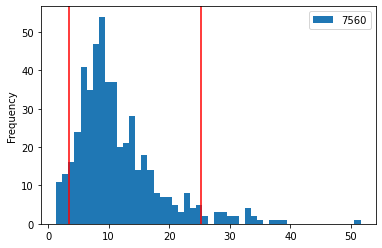

In [99]:
# Visualize the distribution of the ending returns
plt.figure();
ending.plot.hist(bins=50)
plt.axvline(confidence.iloc[0, 0], color="r")
plt.axvline(confidence.iloc[1, 0], color="r")

---

## Retirement Analysis

In this section, you will use the monte carlo model to answer the following retirement planning questions:

1. What are the expected cumulative returns at `30` years for the `10th`, `50th`, and `90th` percentiles?

2. Given an initial investment of `$20,000`, what is the expected return in dollars at the `10th`, `50th`, and `90th` percentiles?

3. Given the current projected annual income from the Plaid analysis, will a `4%` withdrawal rate meet or exceed that value at the `10th` percentile? Note: This is basically determining if retirement income is equivalent to current income.

4. How would a `50%` increase in the initial investment amount affect the `4%` retirement withdrawal? In other words, what happens if the initial investment had been bigger?

### What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?

In [100]:
# Compute cumulative returns
#ending.quantile([.01, .5, .9])
p10 = np.percentile(ending, 10)
p50 = np.percentile(ending, 50)
p90 = np.percentile(ending, 90)
print(p10)
print(p50)
print(p90)

4.756843195850383
9.574940757786596
19.783488238020844


### Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?

In [101]:
# Set initial investment
# Compute expected portfolio return
original = 20000
original * ending.quantile([.01, .5, .9])

,7560
0.01,42294.432181
0.50,191498.815156
0.90,395669.764760


### Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?

Note: This is effectively saying that 90% of the expected returns will be greater than the return at the 10th percentile, so this can help measure the uncertainty about having enough funds at retirement

In [102]:
# Set Plaid's projected income
annual_income =  7389

# Calculate the 4% withdrawal for the ending return as retirement income
retirement = .04 * (investment * ending.quantile(.1)).iloc[0]

# Determine if the retirement income meets or exceeds the current projected income
if retirement >= annual_income:
    print(f"You will have ${retirement:.2f} in retirement income which is sufficient")
else:
    print(f"You will have ${retirement:.2f} in retirement income which is not sufficient")

You will have $3805.47 in retirement income which is not sufficient


### How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

In [103]:
# Re-calculate the retirement income with a 50% increase in the initial investment amount
.04 * (1.5 * investment * ending.quantile(.1)).iloc[0]

5708.211835020459

### Optional Challenge

Use the Monte Carlo data and calculate the cumulative returns at the `5%`, `50%`, and `95%` quartiles and plot this data as a line chart to see how the cumulative returns change over the life of the investment.

In this section, you need to calculate and plot the cumulative returns for the median and `90%` confidence intervals. This plot shows the expected cumulative returns for any given day between the first day and the last day of investment. 

In [104]:
# Compute projected returns
# Display sample data
projected = monte_carlo.quantile(q=[0.05, .5, .95], axis=1, numeric_only=True).T
projected.head()

,0.05,0.50,0.95
0,1.000000,1.000000,1.000000
1,0.989198,1.000413,1.011985
2,0.985955,1.001051,1.016584
3,0.982364,1.001356,1.020967
4,0.978956,1.001873,1.022909


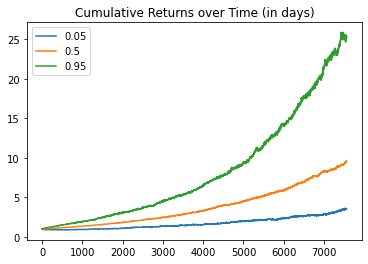

In [105]:
# Plot the cumulative returns over time
projected.plot(title="Cumulative Returns over Time (in days)")

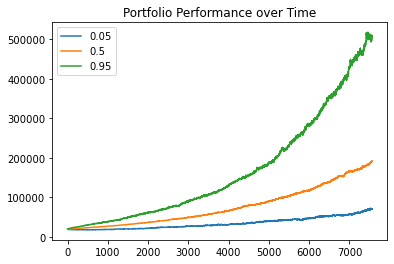

In [106]:
# Compute portfolio performance over time
# Plot projected performance over time
performance = (investment * projected)
performance.plot(title="Portfolio Performance over Time")